In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib

import warnings
warnings.simplefilter("ignore")

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

pd.options.display.max_columns = 85
pd.options.display.max_rows = 1000
%matplotlib inline

sns.set(style='white',context='notebook',palette='deep')

/Users/jietang/anaconda3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
train = pd.read_csv('train_nomiss.csv')
test = pd.read_csv('test_nomiss.csv')



In [3]:
train = train.drop(labels = ["Id"],axis = 1)
test = test.drop(labels = ["Id"],axis = 1)



delete outliers

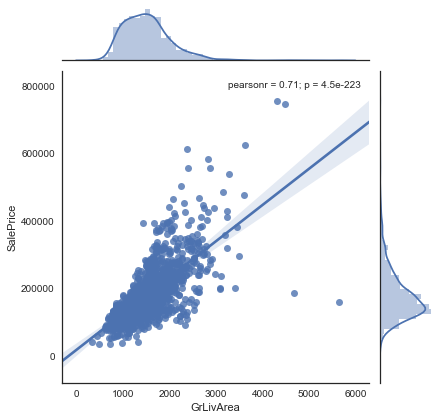

In [4]:
sns.jointplot(x=train['GrLivArea'],y=train['SalePrice'],kind='reg')

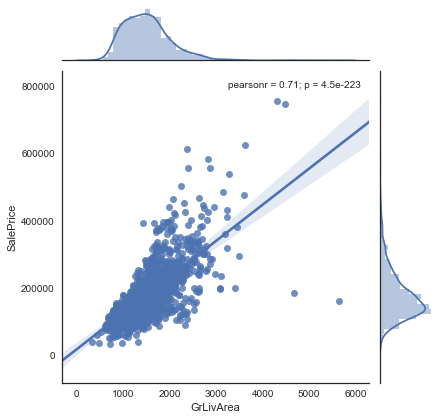

In [5]:
sns.jointplot(x=train['GrLivArea'],y=train['SalePrice'],kind='reg')

transfer the distribution of dependent variable


 mu = 180921.20 and sigma = 79415.29



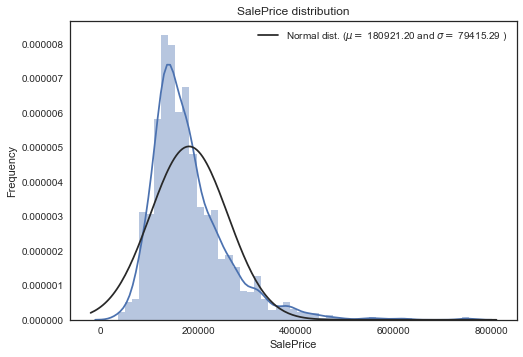

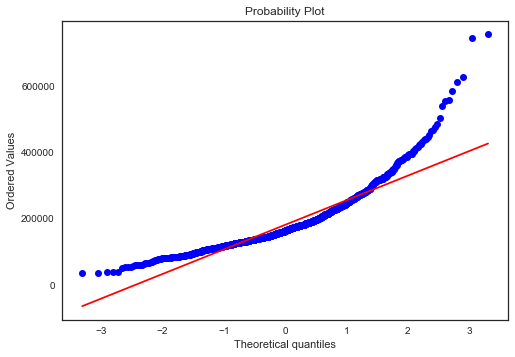

In [6]:
sns.distplot(train['SalePrice'] , fit=stats.norm);

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)


The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.


 mu = 12.02 and sigma = 0.40



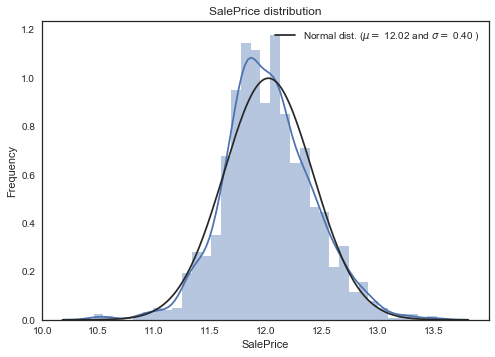

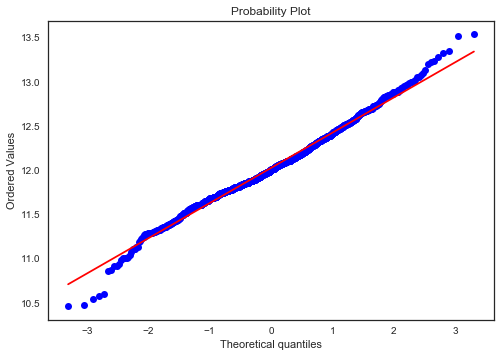

In [7]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=stats.norm);

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['SalePrice'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)


In [8]:
## Join train and test datasets in order to avoid obtain the same number of feature during categorical conversion
train_len = len(train)
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)
dataset.drop('SalePrice',axis=1,inplace=True)

In [9]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
print(quantitative)
print(qualitative)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDri

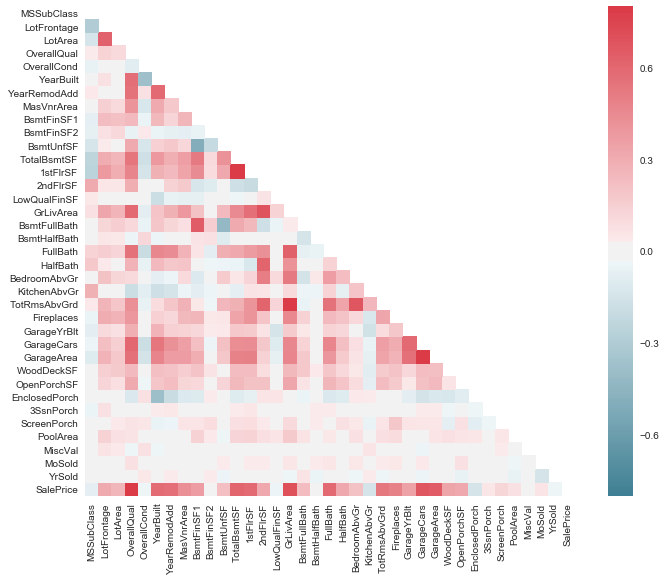

In [48]:
sns.set(style="white")


corrmat = train[quantitative+['SalePrice']].corr()

mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(12,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrmat,mask=mask,cmap=cmap,vmax=0.8,square=True)

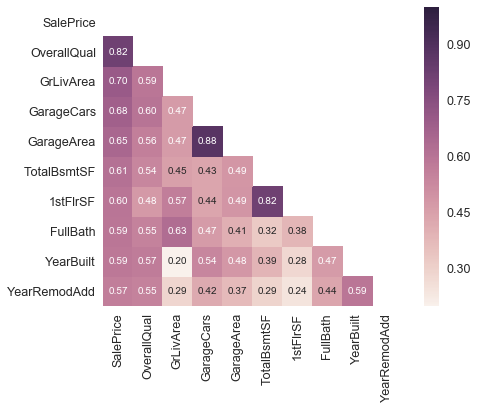

In [46]:
sns.set(style="white")
k = 10
cols = corrmat.nlargest(k,'SalePrice').index
cm = np.corrcoef(train[cols].values.T)

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1.25)
with sns.axes_style("white"):
    hm = sns.heatmap(cm,mask=mask,cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)



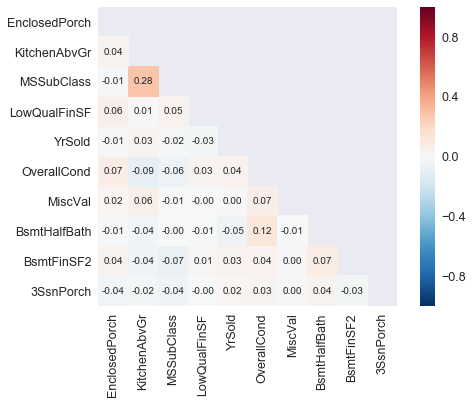

In [12]:
# have problem
sns.set(style="white")
k = 10
cols = corrmat.nsmallest(k,'SalePrice').index
cm = np.corrcoef(train[cols].values.T)

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar=True, mask=mask, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)



Categorical Values

Transforming some numerical variables that are really categorical

In [13]:
#MSSubClass=The building class
dataset['MSSubClass'] = dataset['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
dataset['OverallCond'] = dataset['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
dataset['YrSold'] = dataset['YrSold'].astype(str)
dataset['MoSold'] = dataset['MoSold'].astype(str)


Label Encoding ordered categorical variables

In [14]:
dataset["BsmtCond"] = dataset["BsmtCond"].astype("category",categories=['No','Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["BsmtExposure"] = dataset["BsmtExposure"].astype("category",categories=['No','Mn','Av','Gd'],ordered=True).cat.codes
dataset["BsmtFinType1"] = dataset["BsmtFinType1"].astype("category",categories=['No','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True).cat.codes
dataset["BsmtFinType2"] = dataset["BsmtFinType2"].astype("category",categories=['No','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True).cat.codes
dataset["BsmtQual"] = dataset["BsmtQual"].astype("category",categories=['No','Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["ExterCond"] = dataset["ExterCond"].astype("category",categories=['Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["ExterQual"] = dataset["ExterQual"].astype("category",categories=['Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["Fence"] = dataset["Fence"].astype("category",categories=['No','MnWw','GdWo','MnPrv','GdPrv'],ordered=True).cat.codes
dataset["FireplaceQu"] = dataset["FireplaceQu"].astype("category",categories=['No','Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["Functional"] = dataset["Functional"].astype("category",categories=['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],ordered=True).cat.codes
dataset["GarageCond"] = dataset["GarageCond"].astype("category",categories=['No','Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["GarageFinish"] = dataset["GarageFinish"].astype("category",categories=['No','Unf','RFn','Fin'],ordered=True).cat.codes
dataset["GarageQual"] = dataset["GarageQual"].astype("category",categories=['No','Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["HeatingQC"] = dataset["HeatingQC"].astype("category",categories=['Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["KitchenQual"] = dataset["KitchenQual"].astype("category",categories=['Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["PavedDrive"] = dataset["PavedDrive"].astype("category",categories=['N','P','Y'],ordered=True).cat.codes
dataset["PoolQC"] = dataset["PoolQC"].astype("category",categories=['No','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["Utilities"] = dataset["Utilities"].astype("category",categories=['ELO','NoSeWa','NoSewr','AllPub'],ordered=True).cat.codes


In [15]:
print('Data Type is {0}.'.format(dataset['FireplaceQu'].dtype))
pd.DataFrame(dataset['FireplaceQu'].head(10))

Data Type is int64.


,FireplaceQu
0,3
1,5
2,5
3,2
4,5
5,3
6,2
7,5
8,5
9,5


#### Adding one more important feature

Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house


In [16]:
# Adding total sqfootage feature 
dataset['TotalSF'] = dataset['TotalBsmtSF'] + dataset['1stFlrSF'] + dataset['2ndFlrSF']


#### Skewed features

In [17]:
numeric_feats = dataset.dtypes[dataset.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = dataset[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})

skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947
PoolArea,16.898
LotArea,12.822
LowQualFinSF,12.089
3SsnPorch,11.376
LandSlope,4.975
KitchenAbvGr,4.302
BsmtFinSF2,4.146
EnclosedPorch,4.004
ScreenPorch,3.947


In [18]:
skewness = skewness[abs(skewness) > 0.75].dropna()
skewness['sort'] = skewness.Skew.abs()
skewness = skewness.sort(columns='sort',ascending=False).drop('sort',axis=1)


In [19]:
skewed_features = skewness.index

skewed_features_p3 = list(skewed_features[10:27])
skewed_features_p3

['Functional',
 'EnclosedPorch',
 'ScreenPorch',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCond',
 'CentralAir',
 'GarageQual',
 'BsmtFinType2',
 'PavedDrive',
 'BsmtCond',
 'MasVnrArea',
 'OpenPorchSF',
 'ExterCond',
 'LotFrontage',
 'Fence',
 'WoodDeckSF']

In [20]:

skewed_features_p = ["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","GarageArea","MasVnrArea"
                   ,"TotalBsmtSF","1stFlrSF","2ndFlrSF","3SsnPorch","EnclosedPorch",
                   "GrLivArea","LotArea","LowQualFinSF","OpenPorchSF","PoolArea",
                   "ScreenPorch","WoodDeckSF"]
skewed_features_p2 = ['MiscVal', 'PoolQC', 'PoolArea', 'Street',"MasVnrArea"
                   ,"TotalBsmtSF","1stFlrSF","2ndFlrSF","3SsnPorch","EnclosedPorch",
                   "GrLivArea","LotArea","LowQualFinSF","OpenPorchSF","PoolArea",
                   "ScreenPorch","WoodDeckSF"]


In [21]:
def multiplot(data,features,nrows,ncols,figsize):
    n = 0
    plt.figure(1)
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    colors = sns.color_palette(n_colors=(nrows*ncols))
    for row in range(ncols):
        for col in range(nrows):
            sns.distplot(a = data[features[n]],ax = axes[row,col],color=colors[n])
            skewness = data[features[n]].skew()
            axes[row,col].legend(["Skew : {:.2f}".format(skewness)],loc='upper right')
            n += 1
    plt.tight_layout()
    plt.show()
    plt.gcf().clear()


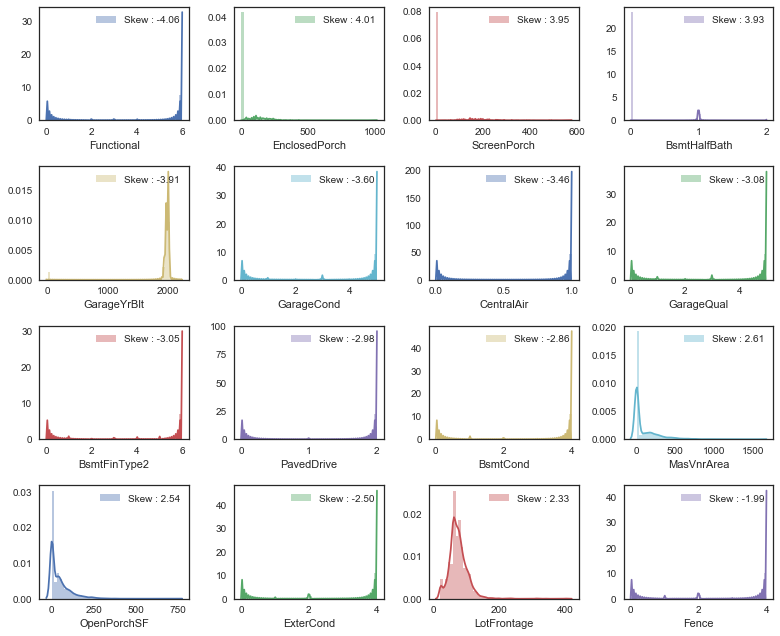

In [22]:
sns.set(style='white')
multiplot(data = dataset,features = skewed_features_p3,
          nrows = 4, ncols = 4, figsize = (11,9))

In [23]:
dataset_log1p = pd.DataFrame()
for feat in skewed_features:
    dataset_log1p[feat] = np.log1p(dataset[feat])


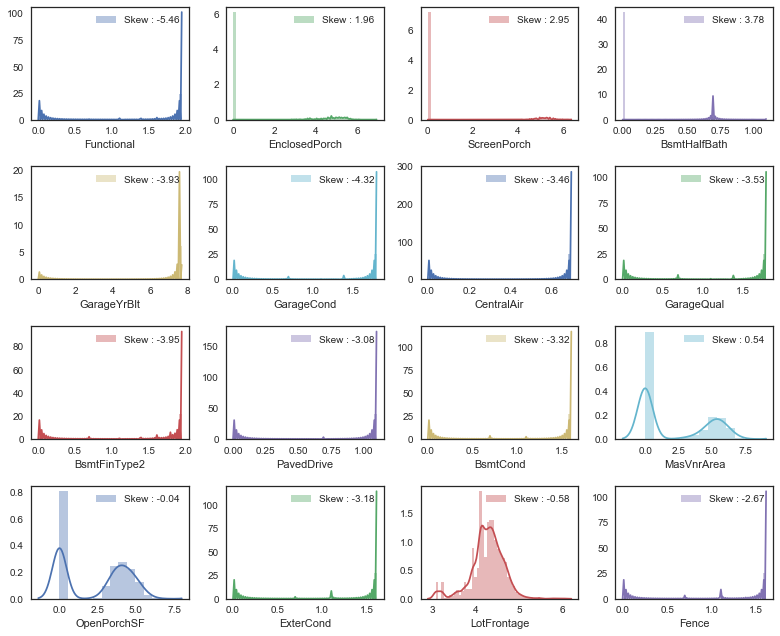

In [24]:
multiplot(data = dataset_log1p,features = skewed_features_p3,
          nrows = 4, ncols = 4, figsize = (11,9))

In [25]:
from scipy.special import boxcox1p
lam = 0.15
for feat in skewed_features:
    dataset[feat] = boxcox1p(dataset[feat], lam)
    

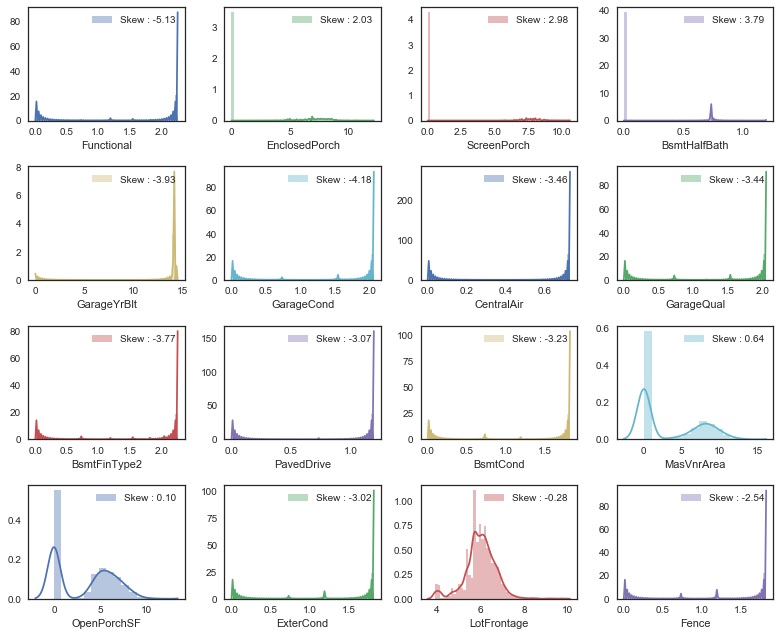

In [26]:
multiplot(data = dataset,features = skewed_features_p3,
          nrows = 4, ncols = 4, figsize = (11,9))

In [27]:
dataset.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF
0,11.693,11.686,0.000,1,3,1Fam,1.820,1.541,11.170,0.000,2,2.260,1.000,0.000,2,7.483,0.730,Norm,Norm,SBrkr,0.000,1.820,1.194,VinylSd,VinylSd,1.820,3,0,PConc,2,2.260,548.000,2.000,2.056,2,2.056,Attchd,14.188,13.699,1,GasA,0,2Story,0.730,1.194,Lvl,0.000,19.212,Inside,5.831,3,0.000,10,RL,8.059,BrkFace,None,0.000,4,CollgCr,5.715,4,7,1.194,0.000,1.541,CompShg,Gable,Normal,WD,0.000,0.730,2.603,11.693,0.000,2003,2003,2,14.977
1,12.792,0.000,0.000,1,3,1Fam,1.820,0.730,12.063,0.000,0,2.260,0.000,0.730,2,8.898,0.730,Feedr,Norm,SBrkr,0.000,1.820,1.541,MetalSd,MetalSd,1.820,5,1,CBlock,2,2.260,460.000,2.000,2.056,2,2.056,Attchd,14.145,12.792,0,GasA,0,1Story,0.730,1.541,Lvl,0.000,19.712,FR2,6.221,3,0.000,5,RL,0.000,None,None,0.000,7,Veenker,0.000,7,6,1.194,0.000,1.541,CompShg,Gable,Normal,WD,0.000,0.730,2.260,12.792,9.010,1976,1976,1,14.923
2,11.892,11.725,0.000,1,3,1Fam,1.820,1.194,10.200,0.000,2,2.260,1.000,0.000,2,9.917,0.730,Norm,Norm,SBrkr,0.000,1.820,1.194,VinylSd,VinylSd,1.820,5,1,PConc,2,2.260,608.000,2.000,2.056,2,2.056,Attchd,14.184,13.832,1,GasA,0,2Story,0.730,1.194,Lvl,0.000,20.347,Inside,5.915,0,0.000,10,RL,7.647,BrkFace,None,0.000,11,CollgCr,5.053,4,7,1.194,0.000,1.541,CompShg,Gable,Normal,WD,0.000,0.730,2.260,11.892,0.000,2001,2002,2,15.150
3,12.014,11.354,0.000,1,3,1Fam,0.730,1.541,8.274,0.000,0,2.260,1.000,0.000,4,10.468,0.730,Norm,Norm,SBrkr,8.798,1.820,1.541,Wd Sdng,Wd Shng,1.820,2,1,BrkTil,1,2.260,642.000,3.000,2.056,3,2.056,Detchd,14.180,13.711,0,GasA,2,2Story,0.730,1.194,Lvl,0.000,19.692,Corner,5.685,0,0.000,11,RL,0.000,None,None,0.000,4,Crawfor,4.745,4,7,1.194,0.000,1.541,CompShg,Gable,Abnorml,WD,0.000,0.730,2.440,11.354,0.000,1915,1970,0,14.857
4,12.511,12.271,0.000,1,4,1Fam,1.820,0.000,10.971,0.000,2,2.260,1.000,0.000,2,10.221,0.730,Norm,Norm,SBrkr,0.000,1.820,1.194,VinylSd,VinylSd,1.820,5,1,PConc,2,2.260,836.000,3.000,2.056,2,2.056,Attchd,14.183,14.480,1,GasA,0,2Story,0.730,1.194,Lvl,0.000,21.325,FR2,6.315,0,0.000,10,RL,9.392,BrkFace,None,0.000,3,NoRidge,6.315,4,8,1.194,0.000,1.541,CompShg,Gable,Normal,WD,0.000,0.730,2.750,12.511,8.014,2000,2000,2,15.852


In [28]:
dataset = pd.get_dummies(dataset)

In [29]:
dataset.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,EnclosedPorch,ExterCond,ExterQual,Fence,FireplaceQu,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,KitchenAbvGr,KitchenQual,LandSlope,LotArea,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MasVnrArea,...,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,11.693,11.686,0.000,1,3,1.820,1.541,11.170,0.000,2,2.260,1.000,0.000,2,7.483,0.730,0.000,1.820,1.194,1.820,3,0,2,2.260,548.000,2.000,2.056,2,2.056,14.188,13.699,1,0,0.730,1.194,0.000,19.212,5.831,3,0.000,10,8.059,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,12.792,0.000,0.000,1,3,1.820,0.730,12.063,0.000,0,2.260,0.000,0.730,2,8.898,0.730,0.000,1.820,1.541,1.820,5,1,2,2.260,460.000,2.000,2.056,2,2.056,14.145,12.792,0,0,0.730,1.541,0.000,19.712,6.221,3,0.000,5,0.000,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,11.892,11.725,0.000,1,3,1.820,1.194,10.200,0.000,2,2.260,1.000,0.000,2,9.917,0.730,0.000,1.820,1.194,1.820,5,1,2,2.260,608.000,2.000,2.056,2,2.056,14.184,13.832,1,0,0.730,1.194,0.000,20.347,5.915,0,0.000,10,7.647,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,12.014,11.354,0.000,1,3,0.730,1.541,8.274,0.000,0,2.260,1.000,0.000,4,10.468,0.730,8.798,1.820,1.541,1.820,2,1,1,2.260,642.000,3.000,2.056,3,2.056,14.180,13.711,0,2,0.730,1.194,0.000,19.692,5.685,0,0.000,11,0.000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,12.511,12.271,0.000,1,4,1.820,0.000,10.971,0.000,2,2.260,1.000,0.000,2,10.221,0.730,0.000,1.820,1.194,1.820,5,1,2,2.260,836.000,3.000,2.056,2,2.056,14.183,14.480,1,0,0.730,1.194,0.000,21.325,6.315,0,0.000,10,9.392,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [30]:
from sklearn.preprocessing import RobustScaler
N =RobustScaler()
dataset_test = N.fit_transform(dataset)

# test = N.transform(dataset)
dataset_test = pd.DataFrame(dataset_test,columns=dataset.columns)

In [31]:
dataset_test.head(20)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,EnclosedPorch,ExterCond,ExterQual,Fence,FireplaceQu,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,KitchenAbvGr,KitchenQual,LandSlope,LotArea,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MasVnrArea,...,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,-0.499,1.047,0.000,0.000,0.000,0.000,0.000,0.147,0.000,0.000,0.000,1.000,0.000,0.000,-0.815,0.000,0.000,0.000,-1.000,0.000,0.000,-1.000,0.000,0.000,0.266,0.000,0.000,0.000,0.000,0.588,0.393,1.000,0.000,0.000,-1.000,0.000,-0.255,-0.256,0.000,0.000,1.000,1.051,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.338,0.000,0.000,0.000,0.000,0.000,-2.338,0.226,0.000,-0.500,0.000,0.000,0.730,0.000,-0.375,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,-0.078,0.000,0.000,0.000,0.000,-0.023,-0.306,0.000,0.000,0.000,0.000,0.000,0.035,0.268,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,-0.347,1.050,0.000,0.000,0.000,0.000,-1.000,0.061,0.000,0.000,0.000,1.000,0.000,0.000,-0.057,0.000,0.000,0.000,-1.000,0.000,2.000,0.000,0.000,0.000,0.500,0.000,0.000,0.000,0.000,0.543,0.496,1.000,0.000,0.000,-1.000,0.000,0.405,-0.144,-1.000,0.000,1.000,0.997,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,-0.255,1.017,0.000,0.000,0.000,-1.090,0.000,-0.110,0.000,-0.500,0.000,1.000,0.000,1.000,0.115,0.000,8.798,0.000,0.000,0.000,-1.000,0.000,-1.000,0.000,0.633,1.000,0.000,0.500,0.000,0.476,0.403,0.000,0.500,0.000,-1.000,0.000,0.023,-0.454,-1.000,0.000,1.200,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.123,1.099,0.000,0.000,1.000,0.000,-4.445,0.129,0.000,0.000,0.000,1.000,0.000,0.000,0.038,0.000,0.000,0.000,-1.000,0.000,2.000,0.000,0.000,0.000,1.391,1.000,0.000,0.000,0.000,0.521,0.996,1.000,0.000,0.000,-1.000,0.000,0.974,0.394,-1.000,0.000,1.000,1.225,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,-0.650,0.949,9.178,0.000,-2.000,0.000,0.000,0.156,0.000,0.000,0.000,1.000,0.000,0.000,-1.339,0.000,0.000,0.000,0.000,-0.626,0.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.500,0.000,0.363,-0.134,1.000,0.000,0.000,0

In [32]:
dataset.head(20)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,EnclosedPorch,ExterCond,ExterQual,Fence,FireplaceQu,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,KitchenAbvGr,KitchenQual,LandSlope,LotArea,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MasVnrArea,...,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,11.693,11.686,0.000,1,3,1.820,1.541,11.170,0.000,2,2.260,1.000,0.000,2,7.483,0.730,0.000,1.820,1.194,1.820,3,0,2,2.260,548.000,2.000,2.056,2,2.056,14.188,13.699,1,0,0.730,1.194,0.000,19.212,5.831,3,0.000,10,8.059,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,12.792,0.000,0.000,1,3,1.820,0.730,12.063,0.000,0,2.260,0.000,0.730,2,8.898,0.730,0.000,1.820,1.541,1.820,5,1,2,2.260,460.000,2.000,2.056,2,2.056,14.145,12.792,0,0,0.730,1.541,0.000,19.712,6.221,3,0.000,5,0.000,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,11.892,11.725,0.000,1,3,1.820,1.194,10.200,0.000,2,2.260,1.000,0.000,2,9.917,0.730,0.000,1.820,1.194,1.820,5,1,2,2.260,608.000,2.000,2.056,2,2.056,14.184,13.832,1,0,0.730,1.194,0.000,20.347,5.915,0,0.000,10,7.647,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,12.014,11.354,0.000,1,3,0.730,1.541,8.274,0.000,0,2.260,1.000,0.000,4,10.468,0.730,8.798,1.820,1.541,1.820,2,1,1,2.260,642.000,3.000,2.056,3,2.056,14.180,13.711,0,2,0.730,1.194,0.000,19.692,5.685,0,0.000,11,0.000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,12.511,12.271,0.000,1,4,1.820,0.000,10.971,0.000,2,2.260,1.000,0.000,2,10.221,0.730,0.000,1.820,1.194,1.820,5,1,2,2.260,836.000,3.000,2.056,2,2.056,14.183,14.480,1,0,0.730,1.194,0.000,21.325,6.315,0,0.000,10,9.392,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,11.494,10.590,9.178,1,1,1.820,1.541,11.267,0.000,2,2.260,1.000,0.000,2,5.803,0.730,0.000,1.820,1.541,1.194,3,0,1,2.260,480.000,2.000,2.056,3,2.056,14.172,13.016,1,0,0.730,1.541,0.000,21.282,6.338,0,0.000,9,0.000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
6,13.670,0.000,0.000,1,3,1.820,0.000,13.031,0.000,2,2.260,1.000,0.000,0,9.156,0.730,0.000,1.820,1.194,1.820,2,1,2,2.260,636.000,2.000,2.056,2,2.056,14.189,13.670,0,0,0.730,1.194,0.000,19.908,6.099,3,0.000,5,7.945,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
7,12.414,12.077,0.000,1,3,1.820,1.194,11.702,4.597,0,0.730,1.000,0.000,2,8.274,0.730,8.395,1.820,1.541,1.820,5,2,2,2.260,484.000,2.000,2.056,2,2.056,14.140,14.321,1,0,0.730,1.541,0.000,20.024,6.692,0,0.000,10,8.511,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
8,12.187,11.340,0.000,1,2,1.820,1.541,0.000,0.000,6,2.260,0.000,0.000,4,11.987,0.730,8.158,1.820,1.541,1.820,5,2,2,1.194,468.000,2.000,2.056,3,0.730,14.073,13.811,0,2,1.194,1.541,0.000,17.990,5.392,3,0.000,9,0.000,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,12.335,0.000,0.000,1,2,1.820,1.541,11.677,0.000,2,2.260,1.000,0.000,4,7.33

In [44]:
X_train = dataset_test[:train_len]
test = dataset_test[train_len:]
Y = train['SalePrice']
Y = pd.DataFrame(Y.reshape((1460,1)))

In [34]:
X_train.shape

(1460, 221)

In [45]:
X_train.to_csv('X_train_EDA.csv',index=False)
Y.to_csv('y_train_EDA.csv',index=False)
test.to_csv('test_EDA.csv',index=False)

In [36]:
X_train.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,EnclosedPorch,ExterCond,ExterQual,Fence,FireplaceQu,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,KitchenAbvGr,KitchenQual,LandSlope,LotArea,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MasVnrArea,...,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,11.693,11.686,0.000,1,3,1.820,1.541,11.170,0.000,2,2.260,1.000,0.000,2,7.483,0.730,0.000,1.820,1.194,1.820,3,0,2,2.260,548.000,2.000,2.056,2,2.056,14.188,13.699,1,0,0.730,1.194,0.000,19.212,5.831,3,0.000,10,8.059,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,12.792,0.000,0.000,1,3,1.820,0.730,12.063,0.000,0,2.260,0.000,0.730,2,8.898,0.730,0.000,1.820,1.541,1.820,5,1,2,2.260,460.000,2.000,2.056,2,2.056,14.145,12.792,0,0,0.730,1.541,0.000,19.712,6.221,3,0.000,5,0.000,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,11.892,11.725,0.000,1,3,1.820,1.194,10.200,0.000,2,2.260,1.000,0.000,2,9.917,0.730,0.000,1.820,1.194,1.820,5,1,2,2.260,608.000,2.000,2.056,2,2.056,14.184,13.832,1,0,0.730,1.194,0.000,20.347,5.915,0,0.000,10,7.647,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,12.014,11.354,0.000,1,3,0.730,1.541,8.274,0.000,0,2.260,1.000,0.000,4,10.468,0.730,8.798,1.820,1.541,1.820,2,1,1,2.260,642.000,3.000,2.056,3,2.056,14.180,13.711,0,2,0.730,1.194,0.000,19.692,5.685,0,0.000,11,0.000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,12.511,12.271,0.000,1,4,1.820,0.000,10.971,0.000,2,2.260,1.000,0.000,2,10.221,0.730,0.000,1.820,1.194,1.820,5,1,2,2.260,836.000,3.000,2.056,2,2.056,14.183,14.480,1,0,0.730,1.194,0.000,21.325,6.315,0,0.000,10,9.392,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,11.494,10.590,9.178,1,1,1.820,1.541,11.267,0.000,2,2.260,1.000,0.000,2,5.803,0.730,0.000,1.820,1.541,1.194,3,0,1,2.260,480.000,2.000,2.056,3,2.056,14.172,13.016,1,0,0.730,1.541,0.000,21.282,6.338,0,0.000,9,0.000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
6,13.670,0.000,0.000,1,3,1.820,0.000,13.031,0.000,2,2.260,1.000,0.000,0,9.156,0.730,0.000,1.820,1.194,1.820,2,1,2,2.260,636.000,2.000,2.056,2,2.056,14.189,13.670,0,0,0.730,1.194,0.000,19.908,6.099,3,0.000,5,7.945,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
7,12.414,12.077,0.000,1,3,1.820,1.194,11.702,4.597,0,0.730,1.000,0.000,2,8.274,0.730,8.395,1.820,1.541,1.820,5,2,2,2.260,484.000,2.000,2.056,2,2.056,14.140,14.321,1,0,0.730,1.541,0.000,20.024,6.692,0,0.000,10,8.511,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
8,12.187,11.340,0.000,1,2,1.820,1.541,0.000,0.000,6,2.260,0.000,0.000,4,11.987,0.730,8.158,1.820,1.541,1.820,5,2,2,1.194,468.000,2.000,2.056,3,0.730,14.073,13.811,0,2,1.194,1.541,0.000,17.990,5.392,3,0.000,9,0.000,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,12.335,0.000,0.000,1,2,1.820,1.541,11.677,0.000,2,2.260,1.000,0.000,4,7.33

In [37]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train)
a['disparity'] = np.log(1./a['pval'].values)
a = a[a['disparity'].notnull()]


TypeError: unsupported operand type(s) for /: 'str' and 'int'

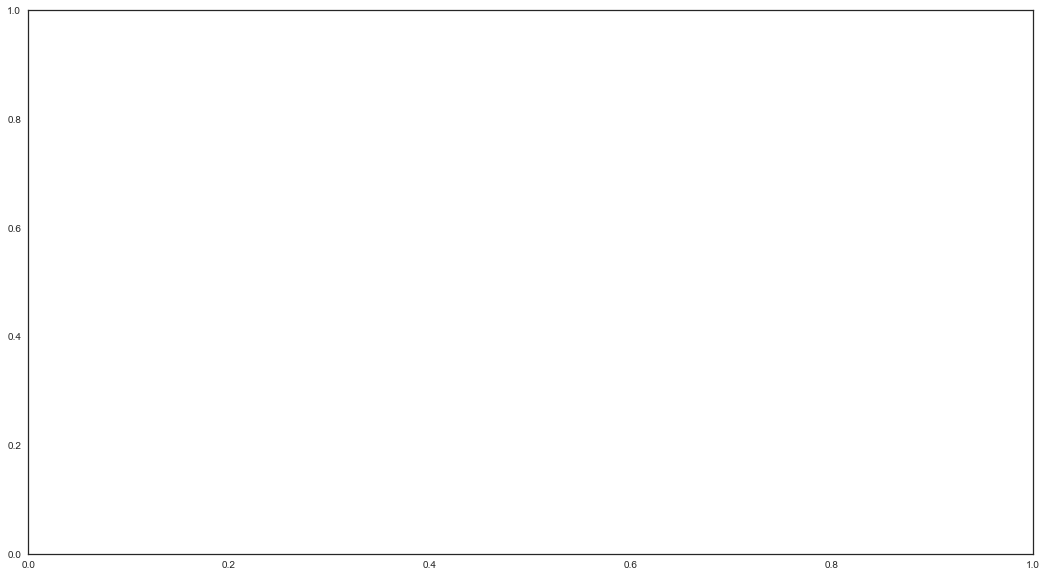

In [49]:
fig,ax = plt.subplots(figsize=(18,10))
b = sns.barplot(data=a, x='feature', y='disparity',orient='h')
b.set_xlabel('feature',fontsize=20)
b.set_ylabel('disparity',fontsize=20)
plt.yticks(fontsize=15)
x = plt.xticks(rotation=90,fontsize=15)


negative log scale, so smaller p-values appear higher up

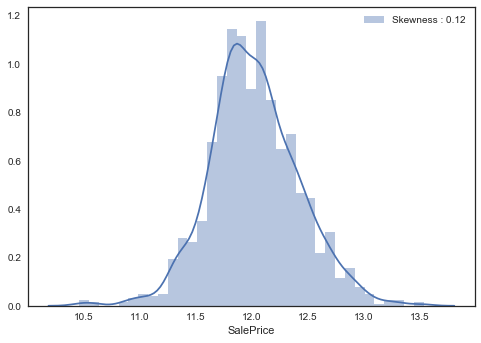

In [39]:
g = sns.distplot(train['SalePrice'])
g = g.legend(['Skewness : {:.2f}'.format(train['SalePrice'].skew())],loc='best')

In [40]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')

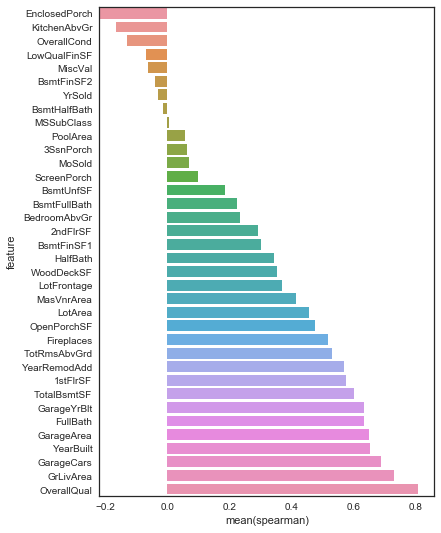

In [41]:
spearman(train, quantitative)

In [42]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


In [43]:
ordering.head(5)

NameError: name 'ordering' is not defined

In [ ]:
features = quantitative + qual_encoded
spearman(train, fetures)